<a href="https://colab.research.google.com/github/Julianpucheta/HCSPD2025/blob/main/Semana%202/Clase_02_CONTROL_II_Identificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistemas de primer orden
Observando la respuesta al escalón en el tiempo de un sistema, si la derivada inicial es muy grande, entonces puede emplearse el método de primer orden con retardo puro. Se puede realizar la identificación de los parámetros a partir de la respuesta al escalón, función Heaviside.
Sea la función prototipo

$G=\frac{Y(s)}{U(s)}=g_1\frac{1}{T_1s+1}  \tag*{}$

cuando se aplica un escalón de amplitud $A$, sería $U(s)=\frac{A}{s}$, por lo que la excursión final del sistema será $g=g_1\cdot A$. En la figura siguiente se detalla el resultado en el dominio temporal, que es donde se tomarán las mediciones de $y(t)$.



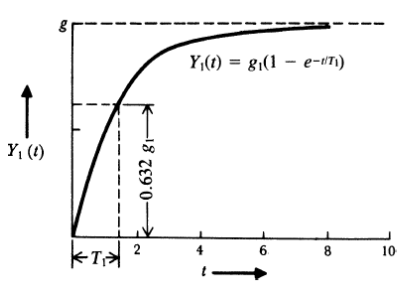

In [ ]:
!pip install -U control qtpy;

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
# import math
import matplotlib.pyplot as plt
import control as ctrl
from control.matlab import * #permite escribir igual que en Matlab
import cmath as cm

In [ ]:
T1=0.5
num=[1]
den=[T1, 1]   # T1=0.5
G=tf(num,den) # G=tf(1,[T1 1])
y1, t1 = step(G) #o agregar t para definir el tiempo de evolución
t = np.linspace(0, 5, 100 )
# Gr=tf('s') Acá se usa Padé
# tao=.8; %Retardo de .8seg
tao = .8
n_pade = 20 #Hasta de orden 20 anda bien.
num_pade, den_pade = pade(tao, n_pade)
G_pade = tf(num_pade, den_pade)
y1, t1 = step(G,t) #o agregar t para definir el tiempo de evolución
# y2, t2 = step(G*G_pade,t) #o agregar t para definir el tiempo de evolución
pos=np.argmin(np.abs(y1-0.632)) #Asumiendo que los valores de y1 correspondan a ganancia unitaria
T1_C=t1[pos]
G_C=tf(num,[T1_C, 1])
yc, tc = step(G_C,t) #o agregar t para definir el tiempo de evolución
# plt.figure()
# plt.plot(t1, y1)
# plt.plot(tc, yc)
# # plt.plot(t2, y2)
# plt.legend(['Salida real','Salida identificada'])
# plt.ylabel('Amplitud')
# plt.xlabel('t(s)')
# plt.show()
df= pd.DataFrame({'t': t1, 'y': y1})
df_id= pd.DataFrame({'t': tc, 'y': yc})
df2 = pd.DataFrame({'tp': [T1_C],'yp': [y1[pos]]})
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='Salida y'))
fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# Customize the layout
fig.update_layout(title='Sistema de primer orden',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()

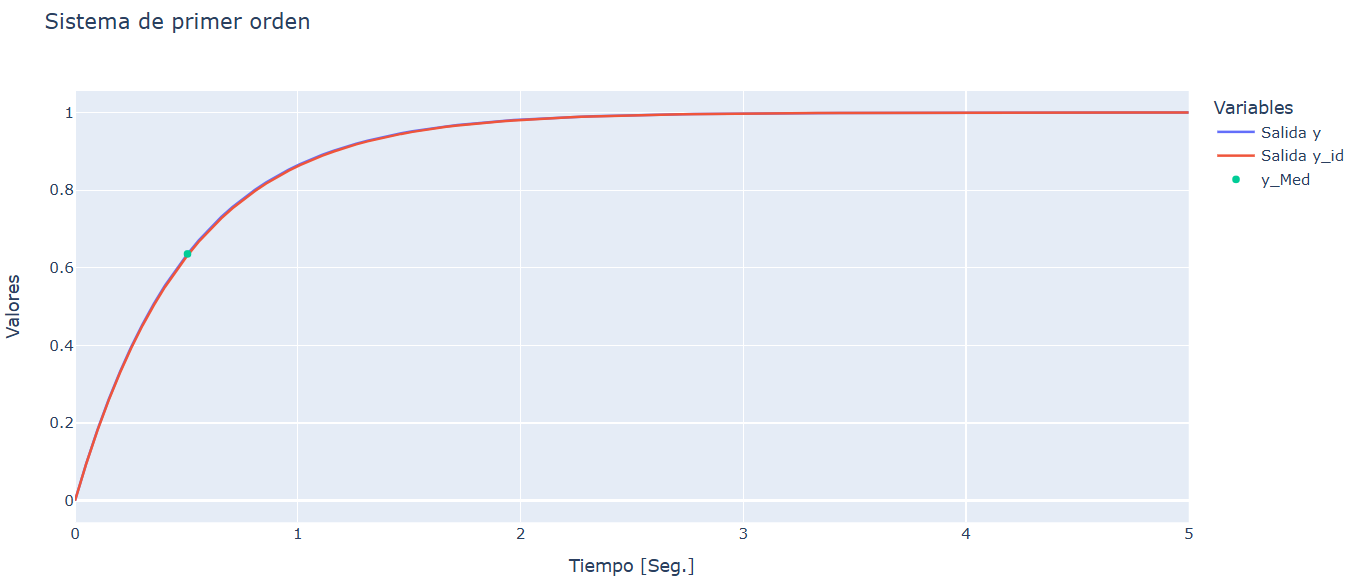

#Sistemas de segundo orden de polos complejos conjugados
Identificación de los parámetros a partir de la respuesta al escalón, función Heaviside.
Sea la función prototipo

$G=\frac{Y(s)}{U(s)}=g_1\frac{\omega_n^2}{s^2 +2\zeta \omega_ns+\omega_n^2}  \tag*{}$

cuando se aplica un escalón de amplitud unitaria $U(s)=\frac{1}{s}$, se tiene que la respuesta temporal será $y(t)$ como

$y(t)=K\left[1- \frac{exp(-\zeta\omega_nt)}{\sqrt{1-\zeta^2}}sen\left(\omega_n\sqrt{1-\zeta^2} \cdot t+cos^{-1}(\zeta)\right) \right]  \tag*{}$

que puede verse en su evolución temporal en la siguiente gráfica.


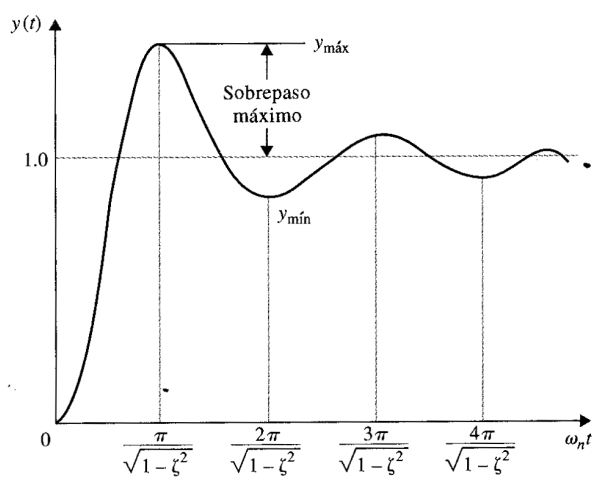

Los polos $\alpha_i$ del sistema están en $-\zeta\omega_n\pm j\omega_d$, siendo $\omega_d=\omega_n \sqrt{1-\zeta^2} $.
La relación de $y_{máx}$ con $\zeta$ es
$\zeta=\frac{ ln(y_{máx}-1)} {\pi\sqrt{1 + \left[\frac{ln(y_{máx}-1)}{\pi} \right]^2 }}.   \tag*{}$

Se tiene entonces, que a partir de los valores de los tiempos correspondientes a $y_{máx}$ y a $y_{mín}$, se tiene que $\omega_d$ resulta
$\omega_d=\frac{ 2\pi } {2\left(t_{y_{min}}- t_{y_{máx}}\right)}.   \tag*{}$

Ahora sí, disponiendo de $\zeta$ y $\omega_d$, se puede hallar $\omega_n$ como

$\omega_n=\frac{ \omega_d} {\sqrt{1-\zeta^2}}.   \tag*{}$


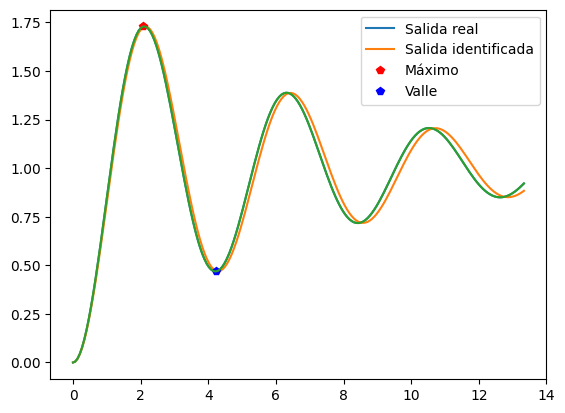

In [ ]:
# wn_r=1.5;
wn_r=1.5
sita_r=.1
Tmax=20. #segundos de simulación
N_Max=200  #puntos de cálculo
# sita_r=.85;
# TMax=20;
sys_G=tf([wn_r**2],[1, 2*sita_r*wn_r, wn_r**2])
sys_real_=sys_G
y , t0=step(sys_G, np.linspace(0,Tmax/wn_r, N_Max ));
a = np.argmax(y)
ymax=y[a]
t1=t0[a]
b=np.argmin(y[a:-1])
ymin=y[b+a]
t2=t0[b+a]
w_d=(2*np.pi)/(2*(t2-t1))
beta=-np.log(ymax-1)/np.pi
sita_id=beta/(np.sqrt(1+beta**2))
wn_id=w_d/(np.sqrt(1-sita_id**2))
den_id=[1, 2*sita_id*wn_id, wn_id**2];
sys_id = tf([wn_id**2], [1, 2*sita_id*wn_id, wn_id**2])
y_id,t_id= step(sys_id,np.linspace(0,Tmax/wn_r, N_Max ))
plt.plot(t0,y)
plt.legend(['y inicial'])
plt.plot(t_id,y_id)
plt.plot(t1,y[a],'pr')
plt.plot(t2,y[a+b-1],'pb') # plot(t2,ymin,'sk');
plt.legend(['Salida real','Salida identificada','Máximo','Valle'])
plt.plot(t0,y)
# df= pd.DataFrame({'t': t0, 'y': y})
# df_id= pd.DataFrame({'t': t_id, 'y': y_id})
# df2 = pd.DataFrame({'tp': [t1 , t2],'yp': [ymax, ymin]})
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='Salida y'))
# fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
# fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# # Customize the layout
# fig.update_layout(title='Sistema de segundo orden',
#                   xaxis_title='Tiempo [Seg.]',
#                   yaxis_title='Valores',
#                   legend_title='Variables',
#                   showlegend=True)
# # Display the interactive Plotly chart
# fig.show()

#Extensión a sistemas de dos polos reales y un cero

In [ ]:
sys_G=16*tf([45, 1],np.convolve([25, 1],[30, 1])) # sys_G=tf(16*[45 1],conv([25 1],[30 1]))
# sys_G=3*tf([10, 1],np.convolve([6, 1],[6, 1]))  # %sys_G=tf(3*[10 1],conv([6 1],[6 1])); %esta tiene los polos iguales
# sys_G=2*tf([8, 1],[1,2,2]) # % sys_G=tf(2*[8 1],([ 1 2 2])); %la otra planta
StepAmplitude = 1.
N_Max=1000 #Cantidad de muestras
t_s= np.linspace(0,200, N_Max ) # t_s=0:2:50;
y , t0=step(sys_G, t_s) # [y,t0]=step(StepAmplitude*sys_G,t_s);
t_inic = 10 #tiempo t1. Con 10 da reales con 20 da complejos.
lugar = np.argmin(np.abs(t_inic-t0)) # [val lugar] =min(abs(t_inic-t0)); y_t1=y(lugar);
y_t1=y[lugar]
t_t1=t0[lugar] # ii=1;
lugar = np.argmin(np.abs(2*t_inic-t0)) # [val lugar] =min(abs(2*t_inic-t0));
t_2t1=t0[lugar]
y_2t1=y[lugar]
lugar = np.argmin(np.abs(3*t_inic-t0)) # [val lugar] =min(abs(3*t_inic-t0));
t_3t1=t0[lugar]
y_3t1=y[lugar]
K=y[-1]/StepAmplitude
k1=(1/StepAmplitude)*y_t1/K-1 #%Afecto el valor del Escalon
k2=(1/StepAmplitude)*y_2t1/K-1
k3=(1/StepAmplitude)*y_3t1/K-1
be=4*(k1**3)*k3-3*(k1**2)*(k2**2)-4*(k2**3)+(k3**2)+6*k1*k2*k3 # be=4*k1^3*k3 -3*k1^2*k2^2  -4*k2^3+k3^2  +6*k1*k2*k3;
if be > 0: #Cambiar el cálculo para usar números complejos
  alfa1=(k1*k2+k3-np.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+np.sqrt(be))/(2*(k1**2+k2))
else :
  alfa1=(k1*k2+k3-cm.sqrt(be))/(2*(k1**2+k2))
  alfa2=(k1*k2+k3+cm.sqrt(be))/(2*(k1**2+k2))
beta=(k1+alfa2)/(alfa1-alfa2)
T1_ang=-t_t1/np.log(alfa1);
T2_ang=-t_t1/np.log(alfa2);
T3_ang=beta*(T1_ang-T2_ang)+T1_ang;
sys_G_ang=K*tf([T3_ang, 1],np.convolve([T1_ang, 1],[T2_ang, 1])) # sys_G_ang=tf(K*[T3_ang 1],conv([T1_ang 1],[T2_ang 1]))
y_id , t_id = step(StepAmplitude*sys_G_ang, t_s)  # step(StepAmplitude*sys_G,'r',StepAmplitude*sys_G_ang,'k',200),hold on
print('Real', sys_G)
print('Identificada', sys_G_ang)
# plt.plot(t0,y)
df= pd.DataFrame({'t': t0, 'y': y})
df_id= pd.DataFrame({'t': t_id, 'y': y_id})
df2 = pd.DataFrame({'tp': [t_t1 , t_2t1, t_3t1 ],'yp': [y_t1, y_2t1,y_3t1 ]})
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'], y=df['y'], mode='lines', name='Salida y'))
fig.add_trace(go.Scatter(x=df_id['t'], y=df_id['y'], mode='lines', name='Salida y_id'))
fig.add_trace(go.Scatter(x=df2['tp'], y=df2['yp'], mode='markers', name='y_Med'))
# Customize the layout
fig.update_layout(title='Sistema de segundo orden y un cero',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()

Real 
    720 s + 16
------------------
750 s^2 + 55 s + 1

Identificada 
    704.7 s + 16.04
-----------------------
734.1 s^2 + 54.22 s + 1



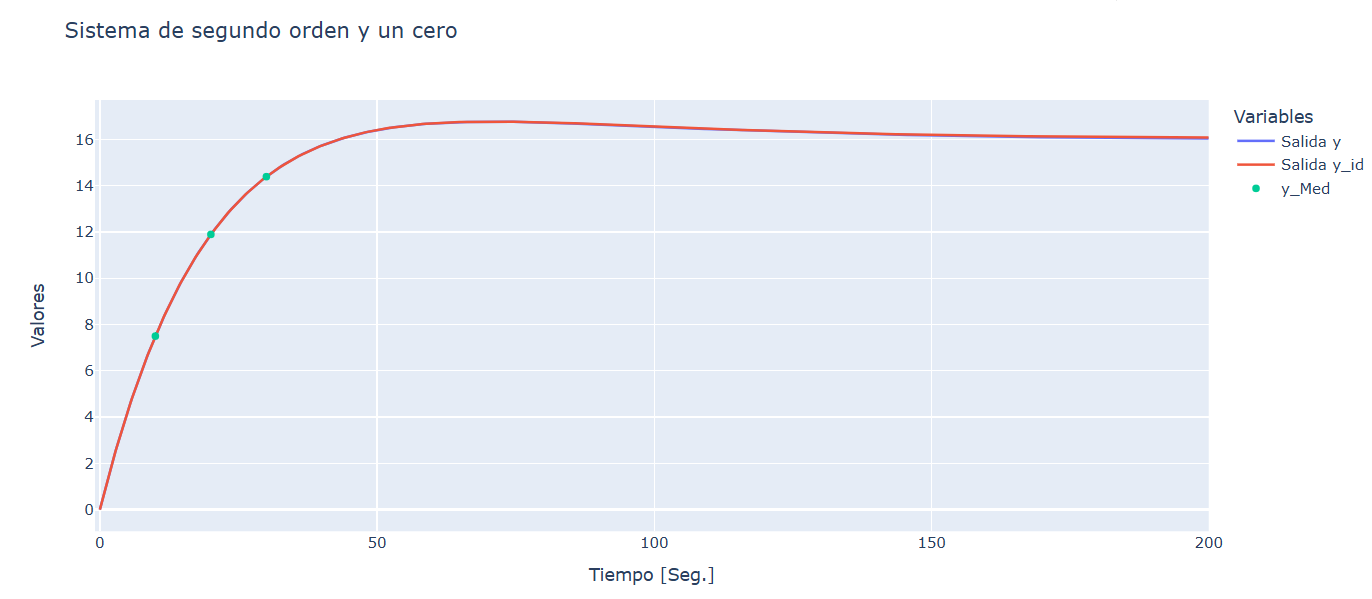

#Recomendaciones finales y conclusiones
Se ha logrado identificar con un error aceptable las funciones de transferencia de primer y segundo orden.
